This is the first part of the code (second part will be in another file stateFarmEx5_Final).

The following two machine learning classification models are implemented in this code:
1. Suppurt Vector Classifier (SVC), and
2. Extreme Gradient Boosting (XGBoost) classifier.

Data cleaning (imputing, encoding, and standardization), data visualization, 
model tuning, and feature elimination are demonstrated.

The main goal of this whole code is to find best parameters for both models 
and also to eliminate less important features by using RFE package of sklearn.

We have another code (in a seperate file) to find model predictions.

In [37]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore') # suppress warnings


# Display options to see large number of row and columns instead of 
# default value 60 (first 30 and last 30)
pd.set_option("max_info_columns", 110)
pd.options.display.max_columns = 110
pd.set_option("max_info_rows", 1000)
pd.options.display.max_rows = 1000

In [38]:
# Import data
train = pd.read_csv('exercise_05_train.csv',sep=',')
test = pd.read_csv('exercise_05_test.csv',sep=',')

print(train.shape) # Find number of (rows, columns)
print(test.shape)
print(train.size,", ", test.size) # size of train and test data (in bytes)
train.head(6)

(40000, 101)
(10000, 100)
4040000 ,  1000000


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.963686,6.627185,-45.224008,9.477531,-3.216532,13.216874,9.754747,5.245851,-1.102918,-2.867482,-37.632285,-12.983484,-30.244259,0.293407,-4.808540,9.293345,1.646353,5.687031,-14.049164,-1.158595,-20.776226,-0.789881,-39.396519,1.235763,-5.403411,-0.012328,0.703963,-22.946374,0.114717,-1.108137,-7.513845,1.278470,-3.606321,1.615670,chrystler,thur,-1.774488,8.804852,2.136329,2.501032,-6.011242,$-865.28,-32.366234,-27.950057,-5.662614,0.02%,-4.820389,26.350661,-17.522879,14.420626,-68.076453,-47.173300,0.954900,-3.708620,4.131492,8.424414,42.155760,-0.772753,-40.332336,4.748333,-9.002899,7.083087,-12.264477,8.626495,0.065363,-0.124457,21.750625,-5.282121,sept.,6.153703,-6.272020,17.255821,5.782086,15.141420,33.884019,-2.389519,-1.766949,-17.897092,3.736479,40.082477,16.640042,1.680384,0.373888,-13.562891,13.158882,2.289092,-3.881315,-15.959124,2.940515,-2.555928,-37.601994,0.988829,0.313772,asia,1.380664,-16.388994,5.326730,4.187294,0.045549,-3.646841,0
1,-1.770062,-23.610459,-0.964003,-31.981497,-10.294599,-10.240251,-1.518888,-1.675208,0.498134,-0.614390,47.652135,6.567264,-30.410216,-1.301751,-6.042590,1.817864,4.379207,5.676816,-37.757544,2.164646,59.052864,-1.480575,-35.736992,-8.580044,4.206910,0.732038,-1.109053,15.986872,-0.534066,5.795439,-2.556791,2.990327,-1.603091,0.633938,volkswagon,thur,0.040507,6.645667,3.205207,3.567783,5.405315,$325.27,-58.117719,-49.488582,-50.291610,-0.01%,1.003284,10.761073,-16.411092,2.474421,-24.002610,7.760549,-0.167079,-5.148356,8.422932,2.882336,47.178502,-0.166740,-36.199657,-0.231633,-2.334688,-4.212509,1.039474,-7.251746,0.661180,-7.073426,-36.774709,-11.458640,July,10.030685,0.918319,-38.648511,-24.077239,16.991279,19.847963,1.106517,6.949901,15.688587,4.610910,-15.223066,4.880278,6.029540,-0.506606,-16.914889,-8.219612,1.639064,7.030400,-11.601869,-4.907436,-6.075066,-27.168761,-2.162863,1.809807,asia,2.500590,4.338834,-1.583225,-1.172417,0.011216,0.097180,0
2,9.962401,-8.349849,23.248891,-24.196879,8.937480,10.965000,-7.490596,-3.025094,0.595807,0.382732,5.629537,3.769767,17.623199,-0.396468,-10.022546,1.158419,12.353464,0.398796,-0.201112,-5.803935,7.104037,2.393360,-30.622601,-12.318385,-6.341881,-0.055468,-1.176393,-13.288725,-0.383693,0.122918,-4.791641,-10.250248,5.837668,-3.756878,bmw,thurday,0.448073,-2.639292,-1.940933,-11.196415,-7.971329,$743.91,-47.325525,17.089850,-20.998601,0.0%,1.270592,20.947667,-1.198462,-1.228983,-16.860396,62.630162,-0.520845,-0.484470,-16.271894,-11.448579,-5.907019,0.627614,-13.539267,2.706494,17.375989,-2.434721,-1.433001,7.734776,0.489224,0.535575,2.491412,-9.652969,July,16.090371,0.180281,10.326921,-12.845434,19.811216,-44.341947,-0.513749,-1.495533,3.605778,0.480531,39.328247,-19.626495,9.321199,1.036403,19.435797,-7.605212,-3.937989,3.702377,-2.246263,1.441523,-5.642358,-90.377656,1.779660,9.528113,asia,1.396475,7.839188,10.402396,1.288991,0.008209,-4.132316,0
3,-5.780709,-25.261584,1.383115,-11.786929,7.993078,-11.245752,-2.607351,-3.513896,-0.614235,-1.453979,-2.636676,-3.595789,-19.648688,0.393391,-3.470142,0.102685,-0.882429,-1.598535,12.869959,5.374145,30.723272,4.541173,-59.270400,-0.101281,4.451334,0.650121,-1.154275,-19.434740,1.471404,9.678197,4.149206,-2.814893,-10.966831,6.516250,nissan,thurday,-0.625046,1.918934,1.046202,-6.727565,8.522306,$538.48,-36.489186,3.120606,-31.523483,0.01%,12.551744,0.908244,-8.868663,-37.101607,40.757401,-22.994817,0.532649,4.227293,6.650745,-0.398449,-9.192991,-0.935667,-61.343401,-14.767857,9.686716,5.354954,0.002768,9.552721,-4.347074,1.513008,14.245827,1.555428,July,10.215072,5.658302,-39.728801,-22.905705,34

In [3]:
# Describe some statistical results for only numerical type variables
# Variables x34, x35, x41, x45, x68, and x93 are of categorical type (not seen in table below).
train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39988.000000,39990.000000,39993.000000,39987.000000,39993.000000,39992.000000,39991.000000,39990.000000,39994.000000,39993.000000,39993.000000,39991.000000,39989.000000,39985.000000,39995.000000,39992.000000,39992.000000,39989.000000,39986.000000,39992.000000,39996.000000,39988.000000,39994.000000,39991.000000,39989.000000,39993.000000,39990.000000,39993.000000,39991.000000,39997.000000,39998.000000,39991.000000,39997.000000,39989.000000,39994.000000,39995.000000,39994.000000,39990.000000,39992.000000,39989.000000,39999.000000,39997.000000,39991.000000,39997.000000,39992.000000,39996.000000,39995.000000,39987.000000,39993.000000,39995.000000,39994.000000,39984.000000,39989.000000,39992.000000,39991.000000,39990.000000,39988.000000,39993.000000,39987.000000,39992.000000,39995.000000,39990.000000,39990.000000,39993.000000,39989.000000,39994.000000,39994.000000,39991.000000,39987.000000,39991.000000,39990.000000,39992.000000,39989.000000,39992.000000,39993.000000,39993.000000,39997.000000,39992.000000,39996.000000,39997.000000,39988.000000,39993.000000,39991.000000,39995.000000,39990.000000,39993.000000,39998.000000,39994.000000,39991.000000,39993.000000,39986.000000,39991.000000,39996.000000,39987.000000,40000.000000
mean,2.020255,-3.924559,1.006619,-1.378330,0.070199,-0.715213,-0.002706,-0.025689,-0.354808,-0.017024,6.665975,0.034923,-5.970745,0.000768,0.000059,0.004214,-0.022206,0.001141,9.541344,-0.002005,6.004879,1.139287,-1.425996,-0.003322,0.045902,0.009791,0.003568,3.660630,-0.004986,0.026592,-0.033786,0.021634,0.018748,-1.008806,0.001262,0.501593,0.007089,0.010948,1.129055,-0.615998,0.132118,-18.847071,0.016371,-0.006230,0.077345,0.046994,8.071981,-6.839185,-0.001841,0.013845,-0.029329,0.054400,-2.012946,-0.004411,-4.254643,-0.035159,-0.006143,-0.009654,-0.004942,-2.519188,-0.028990,-0.017102,-1.116212,-0.079292,-1.662139,0.528315,0.238226,-3.011393,-5.706469,0.355379,0.823520,0.006154,-0.084086,-0.996117,1.274121,-0.105175,0.004829,-0.001569,0.759918,-0.038571,-0.565348,0.043030,0.035157,0.014063,0.003357,-11.953656,0.002118,0.024486,-0.012012,0.019123,-0.317345,-0.562453,0.000484,0.179715,0.203675
std,9.590599,18.768656,21.062970,29.397779,20.243287,18.268807,6.789876,5.600785,1.598967,1.346529,35.801754,6.860888,24.362354,1.878066,7.653960,3.141774,5.093754,4.569268,38.677783,4.983302,30.998365,6.376753,29.629219,7.393135,5.755447,1.935206,0.915606,15.624530,0.669317,5.138766,5.880190,4.343648,4.487099,5.192007,0.843440,3.344011,2.128168,7.986958,21.585912,29.110881,34.320001,76.808795,5.111123,12.891944,9.573325,38.163352,43.364538,39.218449,1.086372,3.804674,5.451172,5.606362,37.285183,0.884665,30.114887,7.745029,5.976125,10.735138,8.108900,13.372699,7.006466,3.713853,19.864809,9.884287,15.149470,2.884789,36.244519,15.230049,30.562153,36.872256,5.364249,4.221527,23.323099,5.489479,25.752753,28.157818,5.359474,0.701151,16.945744,8.734670,2.879633,6.185150,7.829935,3.782974,4.644144,132.765199,1.643530,7.222472,2.813507,8.553992,9.321339,4.050658,0.060034,4.506750,0.402735
min,-36.842503,-79.156374,-89.728356,-126.652341,-76.412886,-73.743342,-26.354840,-21.541786,-6.567005,-5.278747,-150.796197,-27.113879,-105.744748,-7.996824,-31.509585,-12.866864,-19.867273,-17.949113,-146.266220,-20.225637,-137.358930,-25.942111,-127.308041,-36.659329,-20.819297,-7.652042,-4.083499,-61.631683,-2.717812,-21.694339,-25.868453,-17.979339,-18.738550,-23.913613,-3.110609,-13.504928,-8.616528,-30.944255,-88.270717,-146.335965,-137.546988,-365.234831,-21.080267,-53.771044,-41.141187,-162.324390,-168.888735,-165.932582,-4.267943,-14.436732,-21.936625,-22.565781,-159.4962

In [4]:
train.isnull().values.sum() # how much data is missing in total (it's 806 missing data in train data in total)

806

In [5]:
test.isnull().values.sum() # total of 194 missing data in test data

194

In [6]:
# Which variable has how many missing data in training data
train.isnull().sum() 

# Variables with large missing values: 16 in x55, 15 in x13 ; 14 in (x18, x96).
# Nothing is missing in y.

x0     12
x1     10
x2      7
x3     13
x4      7
x5      8
x6      9
x7     10
x8      6
x9      7
x10     7
x11     9
x12    11
x13    15
x14     5
x15     8
x16     8
x17    11
x18    14
x19     8
x20     4
x21    12
x22     6
x23     9
x24    11
x25     7
x26    10
x27     7
x28     9
x29     3
x30     2
x31     9
x32     3
x33    11
x34     8
x35    10
x36     6
x37     5
x38     6
x39    10
x40     8
x41     4
x42    11
x43     1
x44     3
x45     7
x46     9
x47     3
x48     8
x49     4
x50     5
x51    13
x52     7
x53     5
x54     6
x55    16
x56    11
x57     8
x58     9
x59    10
x60    12
x61     7
x62    13
x63     8
x64     5
x65    10
x66    10
x67     7
x68     9
x69    11
x70     6
x71     6
x72     9
x73    13
x74     9
x75    10
x76     8
x77    11
x78     8
x79     7
x80     7
x81     3
x82     8
x83     4
x84     3
x85    12
x86     7
x87     9
x88     5
x89    10
x90     7
x91     2
x92     6
x93     7
x94     9
x95     7
x96    14
x97     9
x98     4
x99    13


In [7]:
# Which variable has how many missing data in test data
test.isnull().sum() 
# Test data does not have y variable
# There are only very small number of missing values in every varible.
# The maximum missing value is 7 in x63, 6 in x48, and 5 in x24 and x86, otherwise it is always less than 4.

x0     2
x1     2
x2     2
x3     0
x4     1
x5     3
x6     2
x7     3
x8     1
x9     2
x10    4
x11    0
x12    1
x13    2
x14    0
x15    1
x16    1
x17    2
x18    1
x19    1
x20    3
x21    3
x22    1
x23    0
x24    5
x25    4
x26    1
x27    2
x28    3
x29    3
x30    3
x31    1
x32    4
x33    1
x34    1
x35    3
x36    3
x37    1
x38    0
x39    0
x40    0
x41    2
x42    4
x43    1
x44    2
x45    0
x46    2
x47    3
x48    6
x49    2
x50    2
x51    0
x52    4
x53    1
x54    0
x55    1
x56    1
x57    2
x58    1
x59    1
x60    2
x61    2
x62    3
x63    7
x64    1
x65    4
x66    1
x67    3
x68    2
x69    3
x70    0
x71    0
x72    1
x73    0
x74    1
x75    2
x76    3
x77    1
x78    2
x79    3
x80    2
x81    3
x82    2
x83    2
x84    0
x85    3
x86    5
x87    0
x88    1
x89    3
x90    1
x91    3
x92    2
x93    1
x94    3
x95    2
x96    3
x97    4
x98    3
x99    2
dtype: int64

In [8]:
# Training data has 100 features (x variables) and one label (y variable with binary class: 0 and 1).
# Test data has only 100 features but no label.

# Find out which feature is numeric (float or int) and which one is categorical type in training data.
# Features x34, x35, x41, x45, x68, and x93 are categorical type (object).
# All other features are of numeric type.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 101 columns):
x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34    object
x35    object
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    object
x42    float64
x43    float64
x44    float64
x45    object
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    fl

In [9]:
import matplotlib.pyplot as plt
# Ratio of sum of class 1 and class 0 of y. Since y has no missing values, 
# the ratio does not change after data cleaning.
ratio = float(np.sum(train.y == 1)) / np.sum(train.y==0)
print(ratio) # 0.25576868740777947: we have 25.6% of class 1 out of total samples (row) of training data
train.groupby("y")['y'].count().plot.bar() # Bar plot of class 1 and class 0

0.25576868740777947


In [39]:
# Impute both data (training and test data): impute numeric data by the column median value, 
# and impute categorical data by maximum occurring element (column mode).
# https://www.kaggle.com/cbrogan/xgboost-example-python

from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X], 
            # The symbol O in np.dtype('O') is capital letter O as in Object.
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
#
train = DataFrameImputer().fit_transform(train) # train data now has no missing data (both numeric and categorical)
test = DataFrameImputer().fit_transform(test) # test data now has no missing data (both numeric and categorical)

In [11]:
print(train.isnull().values.sum())
print(test.isnull().values.sum())
# Now we don't have any missing data in both training data and test data.
# The missing data problem is now cured.

0
0


In [12]:
# categorical variables in training data
categoricalData = train.select_dtypes(include=['object']).copy()
categoricalData.head()

,x34,x35,x41,x45,x68,x93
0,chrystler,thur,$-865.28,0.02%,sept.,asia
1,volkswagon,thur,$325.27,-0.01%,July,asia
2,bmw,thurday,$743.91,0.0%,July,asia
3,nissan,thurday,$538.48,0.01%,July,asia
4,volkswagon,wed,$-433.65,0.0%,Jun,asia


In [13]:
categoricalData.isnull().values.sum() # how many categorical data is missing in total after imputing
# There are no missing data in categorical variables.

0

In [14]:
categoricalData.isnull().sum() # which categorical variable has how many missing items: none

x34    0
x35    0
x41    0
x45    0
x68    0
x93    0
dtype: int64

In [40]:
# Now we gear toward converting categorical varibles into numeric form. We need this
# since the machine learing modules, we will be using, use only numeric data.

# For training data
train['x41'] = train.x41.apply(lambda x: x.replace('$','')) # remove $ sign in x41 variable
train['x45'] = train.x45.apply(lambda x: x.replace('%','')) # remove % sign in x45 variable
# Convert them to float so that we can standardize them
train['x41'] = train['x41'].astype(float)
train['x45'] = train['x45'].astype(float)

# For test data
test['x41'] = test.x41.apply(lambda x: x.replace('$',''))
test['x45'] = test.x45.apply(lambda x: x.replace('%',''))
# Convert them to float so that we can standardize them
test['x41'] = test['x41'].astype('float')
test['x45'] = test['x45'].astype('float')

In [41]:
# Convert categorical variables in numeric form (float) 
# which is needed for classification models we will use later.
from sklearn import preprocessing
num = preprocessing.LabelEncoder()
num.fit(["Honda","Toyota","bmw","chevrolet","chrystler","ford","mercades","nissan","tesla","volkswagon"])
train["x34"] = num.transform(train["x34"]).astype('float')
test["x34"] = num.transform(test["x34"]).astype('float')

train = train.replace(to_replace="wed", value="wednesday")
train = train.replace(to_replace="thur", value="thurday")
train = train.replace(to_replace="fri", value="friday")

test = test.replace(to_replace="wed", value="wednesday")
test = test.replace(to_replace="thur", value="thurday")
test = test.replace(to_replace="fri", value="friday")

num.fit(["friday","monday","thurday","tuesday","wednesday"])

train["x35"] = num.transform(train["x35"]).astype('float')
test["x35"] = num.transform(test["x35"]).astype('float')

num.fit(["Apr","Aug","Dev","Feb","January","July","Jun","Mar","May","Nov","Oct","sept."])
train["x68"] = num.transform(train["x68"]).astype('float')
test["x68"] = num.transform(test["x68"]).astype('float')

num.fit(["america","asia","euorpe"])
train["x93"] = num.transform(train["x93"]).astype('float') 
test["x93"] = num.transform(test["x93"]).astype('float') 

train[["x34","x35","x68","x93"]].dtypes

x34    float64
x35    float64
x68    float64
x93    float64
dtype: object

In [17]:
test[["x34","x35","x68","x93"]].dtypes

x34    float64
x35    float64
x68    float64
x93    float64
dtype: object

In [18]:
# Ensure that all variables are of numerical type (float in this case) 
# so that we can scale (standardize) the variables.
train.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34    float64
x35    float64
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    float64
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
x65    float64
x66    flo

In [19]:
# Ensure that all variables are of numerical type (float in this case)
# so that we can scale (standardize) the variables.
test.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34    float64
x35    float64
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x54    float64
x55    float64
x56    float64
x57    float64
x58    float64
x59    float64
x60    float64
x61    float64
x62    float64
x63    float64
x64    float64
x65    float64
x66    flo

In [20]:
# Find out if any feature (or label) is correlated with another feature (or label)
corr = train.corr()
print(corr)

           x0        x1        x2        x3        x4        x5        x6  \
x0   1.000000 -0.216073 -0.159510 -0.144056 -0.258273 -0.081931  0.002036   
x1  -0.216073  1.000000 -0.026633 -0.033854 -0.019486  0.085917 -0.002607   
x2  -0.159510 -0.026633  1.000000 -0.090230 -0.063998  0.004522  0.001912   
x3  -0.144056 -0.033854 -0.090230  1.000000  0.012888 -0.011239 -0.004446   
x4  -0.258273 -0.019486 -0.063998  0.012888  1.000000  0.004014 -0.002578   
x5  -0.081931  0.085917  0.004522 -0.011239  0.004014  1.000000  0.005042   
x6   0.002036 -0.002607  0.001912 -0.004446 -0.002578  0.005042  1.000000   
x7  -0.003344  0.010310 -0.000065 -0.002610 -0.001084  0.002391  0.003435   
x8   0.111913 -0.119408 -0.003374 -0.023751  0.069873 -0.050108  0.005704   
x9  -0.011634  0.006514  0.000018  0.000128  0.005170  0.004125 -0.003781   
x10  0.248887  0.019201 -0.004942 -0.054896 -0.086182 -0.087534 -0.000473   
x11 -0.007233  0.007193 -0.000847  0.001774  0.001335 -0.001803 -0.004169   

In [21]:
# Find correlation coefficient of label y with features (independent variables).
print(corr['y'].sort_values(ascending=False))

y      1.000000
x97    0.187624
x58    0.185919
x1     0.104977
x99    0.099602
x33    0.096974
x79    0.096403
x69    0.094581
x78    0.092398
x63    0.092179
x40    0.091926
x83    0.091236
x73    0.090140
x2     0.089536
x72    0.089135
x85    0.087130
x51    0.086283
x35    0.062690
x44    0.053392
x53    0.014120
x68    0.013407
x38    0.013329
x74    0.009826
x9     0.008672
x88    0.006995
x7     0.006486
x46    0.006101
x98    0.005965
x13    0.005893
x65    0.005807
x23    0.005371
x18    0.005033
x54    0.005017
x52    0.004751
x25    0.004226
x62    0.004092
x94    0.003524
x36    0.003482
x57    0.002828
x64    0.002107
x60    0.002085
x34    0.001557
x15    0.001364
x47    0.001283
x71    0.000826
x77    0.000311
x49   -0.000064
x28   -0.000259
x87   -0.000363
x61   -0.000602
x55   -0.000684
x84   -0.000832
x32   -0.000924
x76   -0.000968
x39   -0.001064
x11   -0.001099
x26   -0.001285
x81   -0.001481
x90   -0.001556
x91   -0.001588
x24   -0.001944
x59   -0.001961
x27   -0

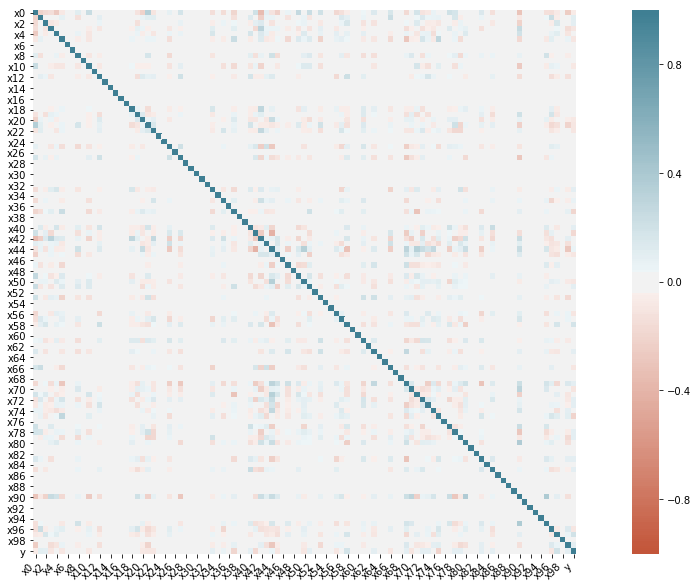

In [22]:
# Plot correlation heatmap to find out if there is any strong correlations among variables (both features and label y)
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,10))
corr = train.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center=0, cmap=sns.diverging_palette(20,220,n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');
# As there is no dark red or dark blue color in the heatmap 
# (except the diagonal with correlation of 1 for a variable to itself), 
# the variables (both features and the label y) are not strongly correlated.

In [42]:
# Represnt all features by X and label by y in training data
X = train.drop(['y'] ,axis=1)
Y = train['y']

In [43]:
# Find the best parameters for the XGBoost classification by grid search
# https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
import datetime
st = datetime.datetime.now() # start time
print("start time: ", st)

# A parameter grid for XGBoost
params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
          'n_estimators': [100, 200, 250, 300, 350, 400],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 0.6,0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.6,0.7, 0.8, 0.9, 1.0],
        'max_depth': [6,7,8,9,10,11]
        }

xgb_model = xgb.XGBClassifier(objective='binary:logistic', silent=True, nthread=1)
folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )
random_search.fit(X, Y)

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

nd = datetime.datetime.now() # end time of running 
print("Code run-time: ", nd-st) # code run time

start time:  2019-09-04 20:05:43.790512
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 26.2min finished



 All results:
{'mean_fit_time': array([ 87.09109344, 174.09016194, 293.5245708 , 261.42872515,
       348.04168301]), 'std_fit_time': array([ 1.67061822,  1.27169891,  3.84696043,  5.58477895, 46.1421096 ]), 'mean_score_time': array([0.20630951, 0.44640837, 0.4728323 , 0.41953044, 0.41341105]), 'std_score_time': array([0.00324411, 0.05185774, 0.08604007, 0.04582966, 0.06288697]), 'param_subsample': masked_array(data=[0.6, 0.6, 0.7, 0.9, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 250, 350, 300, 400],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 10, 5, 7, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 7, 6, 7, 6],
             mask=[False, False, False, False, False]

Best estimator (from above code snippet):
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=7, missing=None,
       n_estimators=300, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)
       
Best hyperparameters:
{'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.7}

In [44]:
from sklearn.metrics import f1_score,classification_report,accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split training data in training and validation samples: 30% validation, 70% training samples
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30, random_state = 42)

# find out rows and columns of X_train and X_valid
print('Training Data Shape:', X_train.shape)
print('validation data shape: ', X_valid.shape)

Training Data Shape: (28000, 100)
validation data shape:  (12000, 100)


In [45]:
# Standardize the features of trianing/validation/test data (with mean=0 and standard deviation=1) so that
# all of them are uniformly evaluated. Since the range of values of raw data varies widely, 
# in some machine learning algorithms, objective functions will not work properly without normalization. 
# For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. 
# If one of the features has a broad range of values, the distance will be governed by this particular feature. 
# Therefore, the range of all features should be normalized so that each feature contributes approximately 
# proportionately to the final distance.

from sklearn import preprocessing 
X_train = preprocessing.scale(X_train) # scale training data
X_valid = preprocessing.scale(X_valid) # scale validation data
test = preprocessing.scale(test)       # Scale the test data
print(X_train.shape)
print(X_valid.shape)
print(test.shape)

(28000, 100)
(12000, 100)
(10000, 100)


Data visualization (before standardization)

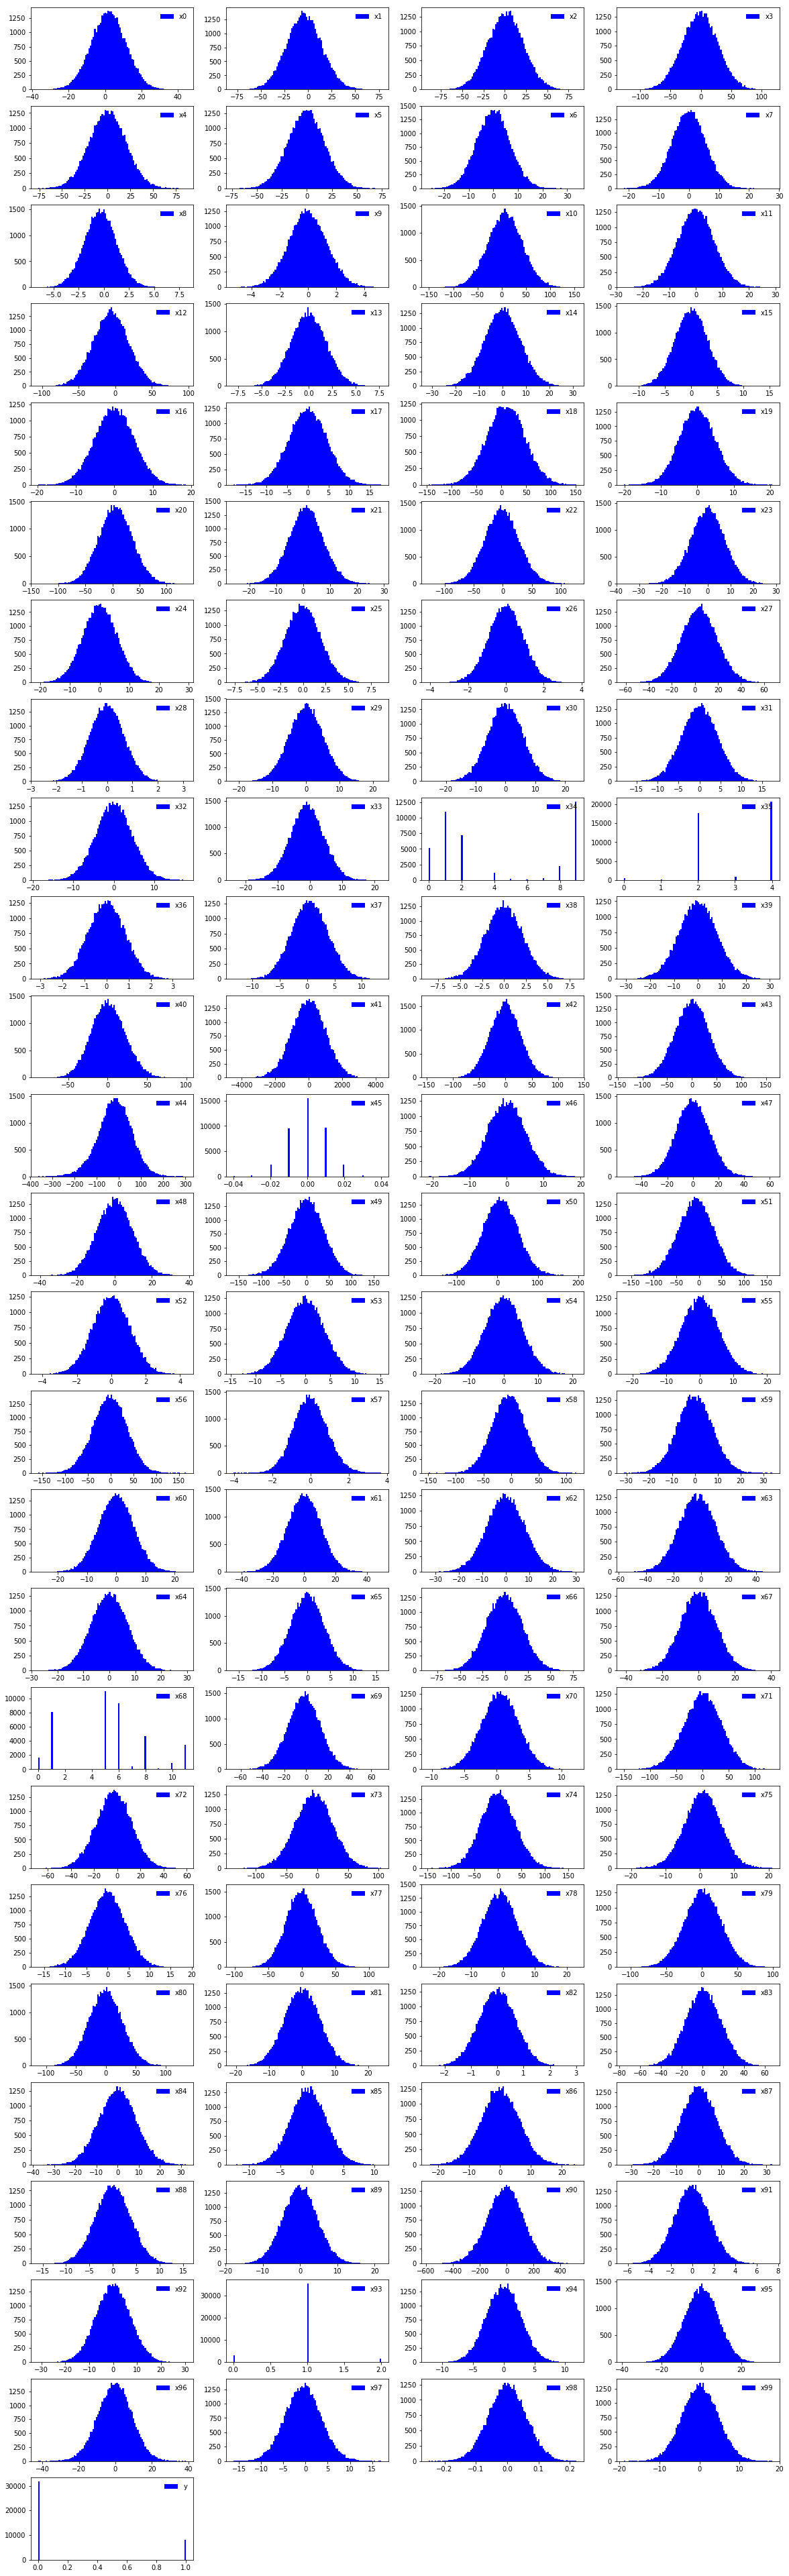

In [25]:
from matplotlib import pyplot as plt

# Define generically how many plots along horizontal (ncols) and vertical (nrows)
ncols=4
nrows = int(np.ceil(len(train.columns)/(1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (20,70))

counter=0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        
        # Plot when we have data
        if counter < len(train.columns):
            ax.hist(train[train.columns[counter]], bins=100, color='blue', label='{}'.format(train.columns[counter]))
            #ax.hist(train[train.columns[counter]], label='{}'.format(train.columns[counter]))
            ax.set_xlabel('')
            ax.set_ylabel('')
            leg=ax.legend(loc='upper right')
            leg.draw_frame(False)
        
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        counter +=1
plt.show()
plt.show()

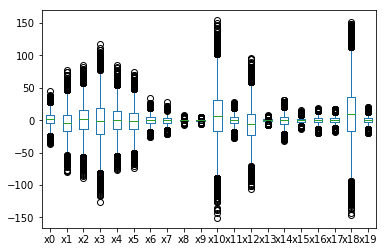

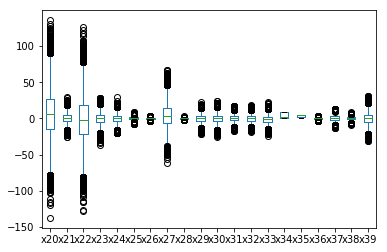

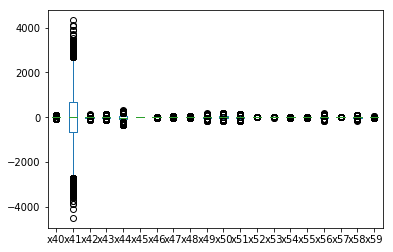

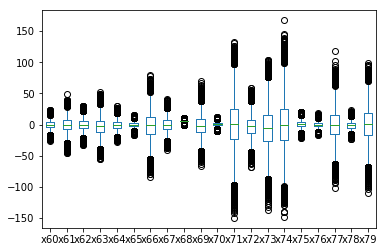

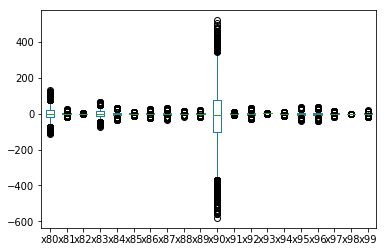

In [26]:
# boxplots show a litte better if there's any outliers.
train.iloc[:,0:20].plot.box()
train.iloc[:,20:40].plot.box()
train.iloc[:,40:60].plot.box()
train.iloc[:,60:80].plot.box()
train.iloc[:,80:100].plot.box()

Below is XGBoost model tuning by finding the best parameters.

In [28]:
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier  
# https://www.kaggle.com/gilbar/xgboost-learning-curve

# Use the best estimater obtained in the previous cell code-snippet
xgbooster = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=7, missing=None,
       n_estimators=300, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)
scorestrain=[]
scorescv=[]
iterations=[]


for i in range(1000,len(X_train),3000) :                
    print(i)
    xgbooster.fit(X_train[:i], y_train[:i], early_stopping_rounds=50, eval_metric="auc",
    eval_set=[(X_valid, y_valid)])
    scorestrain.append(roc_auc_score(y_train[:i], xgbooster.predict_proba(X_train[:i], 
                                                                          ntree_limit=xgbooster.best_iteration)[:,1]))
    scorescv.append(roc_auc_score(y_valid,xgbooster.predict_proba(X_valid,ntree_limit=xgbooster.best_iteration)[:,1]))
    iterations.append(i)
#   

1000
[0]	validation_0-auc:0.696698
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.745032
[2]	validation_0-auc:0.761802
[3]	validation_0-auc:0.785194
[4]	validation_0-auc:0.79109
[5]	validation_0-auc:0.799272
[6]	validation_0-auc:0.814073
[7]	validation_0-auc:0.822014
[8]	validation_0-auc:0.826785
[9]	validation_0-auc:0.831606
[10]	validation_0-auc:0.835225
[11]	validation_0-auc:0.837123
[12]	validation_0-auc:0.84482
[13]	validation_0-auc:0.847894
[14]	validation_0-auc:0.852367
[15]	validation_0-auc:0.85672
[16]	validation_0-auc:0.857131
[17]	validation_0-auc:0.858337
[18]	validation_0-auc:0.86128
[19]	validation_0-auc:0.865279
[20]	validation_0-auc:0.868829
[21]	validation_0-auc:0.869359
[22]	validation_0-auc:0.873664
[23]	validation_0-auc:0.874807
[24]	validation_0-auc:0.875215
[25]	validation_0-auc:0.874765
[26]	validation_0-auc:0.875386
[27]	validation_0-auc:0.874426
[28]	validation_0-auc:0.877743
[29]	validation_0-auc:0.876807
[30]	validation

[108]	validation_0-auc:0.964969
[109]	validation_0-auc:0.964942
[110]	validation_0-auc:0.964974
[111]	validation_0-auc:0.965049
[112]	validation_0-auc:0.965061
[113]	validation_0-auc:0.965099
[114]	validation_0-auc:0.965099
[115]	validation_0-auc:0.965188
[116]	validation_0-auc:0.965337
[117]	validation_0-auc:0.965375
[118]	validation_0-auc:0.965304
[119]	validation_0-auc:0.965464
[120]	validation_0-auc:0.965652
[121]	validation_0-auc:0.965684
[122]	validation_0-auc:0.96559
[123]	validation_0-auc:0.965706
[124]	validation_0-auc:0.96573
[125]	validation_0-auc:0.965755
[126]	validation_0-auc:0.96587
[127]	validation_0-auc:0.966003
[128]	validation_0-auc:0.965925
[129]	validation_0-auc:0.965883
[130]	validation_0-auc:0.966073
[131]	validation_0-auc:0.965969
[132]	validation_0-auc:0.965806
[133]	validation_0-auc:0.965842
[134]	validation_0-auc:0.965985
[135]	validation_0-auc:0.96591
[136]	validation_0-auc:0.965869
[137]	validation_0-auc:0.965905
[138]	validation_0-auc:0.965889
[139]	valida

[110]	validation_0-auc:0.973407
[111]	validation_0-auc:0.973487
[112]	validation_0-auc:0.973576
[113]	validation_0-auc:0.973597
[114]	validation_0-auc:0.973531
[115]	validation_0-auc:0.973665
[116]	validation_0-auc:0.973627
[117]	validation_0-auc:0.973728
[118]	validation_0-auc:0.973761
[119]	validation_0-auc:0.973751
[120]	validation_0-auc:0.973771
[121]	validation_0-auc:0.973781
[122]	validation_0-auc:0.973867
[123]	validation_0-auc:0.973908
[124]	validation_0-auc:0.973855
[125]	validation_0-auc:0.973944
[126]	validation_0-auc:0.974051
[127]	validation_0-auc:0.974087
[128]	validation_0-auc:0.974275
[129]	validation_0-auc:0.974299
[130]	validation_0-auc:0.974436
[131]	validation_0-auc:0.974402
[132]	validation_0-auc:0.974338
[133]	validation_0-auc:0.974379
[134]	validation_0-auc:0.974419
[135]	validation_0-auc:0.9744
[136]	validation_0-auc:0.974517
[137]	validation_0-auc:0.974514
[138]	validation_0-auc:0.974605
[139]	validation_0-auc:0.974555
[140]	validation_0-auc:0.974605
[141]	vali

[68]	validation_0-auc:0.978219
[69]	validation_0-auc:0.978286
[70]	validation_0-auc:0.978339
[71]	validation_0-auc:0.978355
[72]	validation_0-auc:0.978322
[73]	validation_0-auc:0.978568
[74]	validation_0-auc:0.978698
[75]	validation_0-auc:0.978729
[76]	validation_0-auc:0.978892
[77]	validation_0-auc:0.978862
[78]	validation_0-auc:0.978831
[79]	validation_0-auc:0.978808
[80]	validation_0-auc:0.979018
[81]	validation_0-auc:0.979088
[82]	validation_0-auc:0.979119
[83]	validation_0-auc:0.979173
[84]	validation_0-auc:0.9792
[85]	validation_0-auc:0.979292
[86]	validation_0-auc:0.979341
[87]	validation_0-auc:0.979423
[88]	validation_0-auc:0.979399
[89]	validation_0-auc:0.97943
[90]	validation_0-auc:0.979479
[91]	validation_0-auc:0.97944
[92]	validation_0-auc:0.979731
[93]	validation_0-auc:0.97976
[94]	validation_0-auc:0.979721
[95]	validation_0-auc:0.97975
[96]	validation_0-auc:0.979603
[97]	validation_0-auc:0.979743
[98]	validation_0-auc:0.979818
[99]	validation_0-auc:0.97985
[100]	validatio

[26]	validation_0-auc:0.970736
[27]	validation_0-auc:0.971217
[28]	validation_0-auc:0.972062
[29]	validation_0-auc:0.972528
[30]	validation_0-auc:0.972865
[31]	validation_0-auc:0.97338
[32]	validation_0-auc:0.973955
[33]	validation_0-auc:0.974315
[34]	validation_0-auc:0.974555
[35]	validation_0-auc:0.97496
[36]	validation_0-auc:0.975358
[37]	validation_0-auc:0.975471
[38]	validation_0-auc:0.975975
[39]	validation_0-auc:0.976243
[40]	validation_0-auc:0.976247
[41]	validation_0-auc:0.976621
[42]	validation_0-auc:0.97694
[43]	validation_0-auc:0.977146
[44]	validation_0-auc:0.97736
[45]	validation_0-auc:0.977528
[46]	validation_0-auc:0.977545
[47]	validation_0-auc:0.977692
[48]	validation_0-auc:0.977745
[49]	validation_0-auc:0.978054
[50]	validation_0-auc:0.978294
[51]	validation_0-auc:0.978369
[52]	validation_0-auc:0.9786
[53]	validation_0-auc:0.978748
[54]	validation_0-auc:0.978889
[55]	validation_0-auc:0.97899
[56]	validation_0-auc:0.979048
[57]	validation_0-auc:0.97927
[58]	validation_

[286]	validation_0-auc:0.983279
[287]	validation_0-auc:0.983283
[288]	validation_0-auc:0.983269
[289]	validation_0-auc:0.983305
[290]	validation_0-auc:0.983296
[291]	validation_0-auc:0.983322
[292]	validation_0-auc:0.983339
[293]	validation_0-auc:0.983364
[294]	validation_0-auc:0.983345
[295]	validation_0-auc:0.983332
[296]	validation_0-auc:0.983326
[297]	validation_0-auc:0.98332
[298]	validation_0-auc:0.98331
[299]	validation_0-auc:0.983308
16000
[0]	validation_0-auc:0.784883
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.83962
[2]	validation_0-auc:0.874283
[3]	validation_0-auc:0.894602
[4]	validation_0-auc:0.905148
[5]	validation_0-auc:0.914527
[6]	validation_0-auc:0.923472
[7]	validation_0-auc:0.928975
[8]	validation_0-auc:0.933668
[9]	validation_0-auc:0.939912
[10]	validation_0-auc:0.943415
[11]	validation_0-auc:0.946624
[12]	validation_0-auc:0.950632
[13]	validation_0-auc:0.95172
[14]	validation_0-auc:0.954954
[15]	validation_0-auc:0.957569


[245]	validation_0-auc:0.983834
[246]	validation_0-auc:0.983847
[247]	validation_0-auc:0.983852
[248]	validation_0-auc:0.983834
[249]	validation_0-auc:0.983822
[250]	validation_0-auc:0.983851
[251]	validation_0-auc:0.983865
[252]	validation_0-auc:0.98386
[253]	validation_0-auc:0.983856
[254]	validation_0-auc:0.983864
[255]	validation_0-auc:0.983863
[256]	validation_0-auc:0.983884
[257]	validation_0-auc:0.983889
[258]	validation_0-auc:0.983874
[259]	validation_0-auc:0.9839
[260]	validation_0-auc:0.983912
[261]	validation_0-auc:0.983921
[262]	validation_0-auc:0.983956
[263]	validation_0-auc:0.983962
[264]	validation_0-auc:0.98399
[265]	validation_0-auc:0.984019
[266]	validation_0-auc:0.984026
[267]	validation_0-auc:0.984059
[268]	validation_0-auc:0.984036
[269]	validation_0-auc:0.984013
[270]	validation_0-auc:0.984031
[271]	validation_0-auc:0.984041
[272]	validation_0-auc:0.984013
[273]	validation_0-auc:0.983966
[274]	validation_0-auc:0.983989
[275]	validation_0-auc:0.984005
[276]	valida

[204]	validation_0-auc:0.984214
[205]	validation_0-auc:0.984249
[206]	validation_0-auc:0.984252
[207]	validation_0-auc:0.984275
[208]	validation_0-auc:0.984262
[209]	validation_0-auc:0.984299
[210]	validation_0-auc:0.984332
[211]	validation_0-auc:0.98439
[212]	validation_0-auc:0.9844
[213]	validation_0-auc:0.984391
[214]	validation_0-auc:0.984388
[215]	validation_0-auc:0.984362
[216]	validation_0-auc:0.984369
[217]	validation_0-auc:0.984355
[218]	validation_0-auc:0.984383
[219]	validation_0-auc:0.984373
[220]	validation_0-auc:0.984389
[221]	validation_0-auc:0.984416
[222]	validation_0-auc:0.984435
[223]	validation_0-auc:0.984443
[224]	validation_0-auc:0.98444
[225]	validation_0-auc:0.984429
[226]	validation_0-auc:0.984426
[227]	validation_0-auc:0.984433
[228]	validation_0-auc:0.984419
[229]	validation_0-auc:0.984439
[230]	validation_0-auc:0.984432
[231]	validation_0-auc:0.984423
[232]	validation_0-auc:0.984424
[233]	validation_0-auc:0.984447
[234]	validation_0-auc:0.984444
[235]	valida

[163]	validation_0-auc:0.984133
[164]	validation_0-auc:0.984142
[165]	validation_0-auc:0.984182
[166]	validation_0-auc:0.984208
[167]	validation_0-auc:0.984201
[168]	validation_0-auc:0.984192
[169]	validation_0-auc:0.984181
[170]	validation_0-auc:0.984223
[171]	validation_0-auc:0.984202
[172]	validation_0-auc:0.984186
[173]	validation_0-auc:0.984256
[174]	validation_0-auc:0.984317
[175]	validation_0-auc:0.984296
[176]	validation_0-auc:0.984304
[177]	validation_0-auc:0.984346
[178]	validation_0-auc:0.984341
[179]	validation_0-auc:0.984401
[180]	validation_0-auc:0.98445
[181]	validation_0-auc:0.984465
[182]	validation_0-auc:0.984438
[183]	validation_0-auc:0.984411
[184]	validation_0-auc:0.98443
[185]	validation_0-auc:0.984439
[186]	validation_0-auc:0.984419
[187]	validation_0-auc:0.984406
[188]	validation_0-auc:0.984442
[189]	validation_0-auc:0.984413
[190]	validation_0-auc:0.984458
[191]	validation_0-auc:0.984496
[192]	validation_0-auc:0.984507
[193]	validation_0-auc:0.984541
[194]	vali

[122]	validation_0-auc:0.983608
[123]	validation_0-auc:0.983635
[124]	validation_0-auc:0.983703
[125]	validation_0-auc:0.98375
[126]	validation_0-auc:0.983777
[127]	validation_0-auc:0.98377
[128]	validation_0-auc:0.983742
[129]	validation_0-auc:0.983731
[130]	validation_0-auc:0.983746
[131]	validation_0-auc:0.983746
[132]	validation_0-auc:0.983761
[133]	validation_0-auc:0.983742
[134]	validation_0-auc:0.983777
[135]	validation_0-auc:0.983786
[136]	validation_0-auc:0.983769
[137]	validation_0-auc:0.98389
[138]	validation_0-auc:0.983864
[139]	validation_0-auc:0.983895
[140]	validation_0-auc:0.983951
[141]	validation_0-auc:0.983994
[142]	validation_0-auc:0.984107
[143]	validation_0-auc:0.984182
[144]	validation_0-auc:0.984225
[145]	validation_0-auc:0.984193
[146]	validation_0-auc:0.984219
[147]	validation_0-auc:0.984272
[148]	validation_0-auc:0.984255
[149]	validation_0-auc:0.984248
[150]	validation_0-auc:0.984252
[151]	validation_0-auc:0.984258
[152]	validation_0-auc:0.984259
[153]	valid

28000
[1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000]


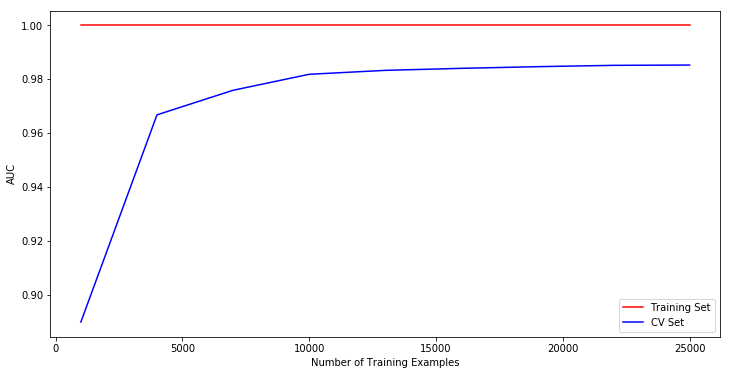

In [29]:
# (continued from above cell)
print(len(X_train))
plt.figure(figsize=(12,6))
plt.plot(iterations,scorestrain,'r')
plt.plot(iterations,scorescv, 'b')
print(iterations)
plt.xlabel('Number of Training Examples')
plt.ylabel('AUC')
plt.legend(['Training Set','CV Set'],loc='lower right')

In [30]:
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier  

# This code will show two sets of plots: logloss and classification error at the end of the output
# after finishing all 300 n_estimators (the number of boosting rounds or the number of trees to fit)
# Use the best estimater obtained in previous cell code-snippet
model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=7, missing=None,
       n_estimators=300, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9).fit(X_train, y_train)
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for validation data
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.15425	validation_0-logloss:0.594566	validation_1-error:0.170333	validation_1-logloss:0.599479
[1]	validation_0-error:0.129643	validation_0-logloss:0.521788	validation_1-error:0.150833	validation_1-logloss:0.532686
[2]	validation_0-error:0.117107	validation_0-logloss:0.466854	validation_1-error:0.1405	validation_1-logloss:0.48296
[3]	validation_0-error:0.108714	validation_0-logloss:0.420389	validation_1-error:0.131167	validation_1-logloss:0.441178
[4]	validation_0-error:0.102964	validation_0-logloss:0.385941	validation_1-error:0.12775	validation_1-logloss:0.409771
[5]	validation_0-error:0.097357	validation_0-logloss:0.355559	validation_1-error:0.123417	validation_1-logloss:0.383192
[6]	validation_0-error:0.091107	validation_0-logloss:0.329863	validation_1-error:0.1195	validation_1-logloss:0.360838
[7]	validation_0-error:0.086286	validation_0-logloss:0.308882	validation_1-error:0.11525	validation_1-logloss:0.342981
[8]	validation_0-error:0.080607	validation_0-log

[69]	validation_0-error:0.006179	validation_0-logloss:0.054014	validation_1-error:0.041833	validation_1-logloss:0.126625
[70]	validation_0-error:0.006071	validation_0-logloss:0.053517	validation_1-error:0.041083	validation_1-logloss:0.126186
[71]	validation_0-error:0.005893	validation_0-logloss:0.052672	validation_1-error:0.04075	validation_1-logloss:0.125231
[72]	validation_0-error:0.005821	validation_0-logloss:0.051936	validation_1-error:0.041083	validation_1-logloss:0.1244
[73]	validation_0-error:0.005679	validation_0-logloss:0.050703	validation_1-error:0.04025	validation_1-logloss:0.123215
[74]	validation_0-error:0.005607	validation_0-logloss:0.049829	validation_1-error:0.039917	validation_1-logloss:0.122916
[75]	validation_0-error:0.0055	validation_0-logloss:0.049309	validation_1-error:0.0395	validation_1-logloss:0.122717
[76]	validation_0-error:0.005464	validation_0-logloss:0.048497	validation_1-error:0.039083	validation_1-logloss:0.121874
[77]	validation_0-error:0.005107	validat

[138]	validation_0-error:0.001857	validation_0-logloss:0.022591	validation_1-error:0.0315	validation_1-logloss:0.101778
[139]	validation_0-error:0.001821	validation_0-logloss:0.022467	validation_1-error:0.031917	validation_1-logloss:0.101849
[140]	validation_0-error:0.00175	validation_0-logloss:0.022112	validation_1-error:0.031667	validation_1-logloss:0.101541
[141]	validation_0-error:0.00175	validation_0-logloss:0.021945	validation_1-error:0.03175	validation_1-logloss:0.101355
[142]	validation_0-error:0.001643	validation_0-logloss:0.021717	validation_1-error:0.03175	validation_1-logloss:0.101477
[143]	validation_0-error:0.001607	validation_0-logloss:0.021408	validation_1-error:0.031667	validation_1-logloss:0.101116
[144]	validation_0-error:0.001429	validation_0-logloss:0.021115	validation_1-error:0.031667	validation_1-logloss:0.101161
[145]	validation_0-error:0.001286	validation_0-logloss:0.02075	validation_1-error:0.031833	validation_1-logloss:0.100897
[146]	validation_0-error:0.0012

[207]	validation_0-error:0	validation_0-logloss:0.011033	validation_1-error:0.028333	validation_1-logloss:0.093886
[208]	validation_0-error:0	validation_0-logloss:0.010929	validation_1-error:0.02825	validation_1-logloss:0.093709
[209]	validation_0-error:0	validation_0-logloss:0.010848	validation_1-error:0.027667	validation_1-logloss:0.093585
[210]	validation_0-error:0	validation_0-logloss:0.010711	validation_1-error:0.027667	validation_1-logloss:0.09331
[211]	validation_0-error:0	validation_0-logloss:0.010592	validation_1-error:0.02775	validation_1-logloss:0.093218
[212]	validation_0-error:0	validation_0-logloss:0.010492	validation_1-error:0.027917	validation_1-logloss:0.093252
[213]	validation_0-error:0	validation_0-logloss:0.010399	validation_1-error:0.02775	validation_1-logloss:0.09314
[214]	validation_0-error:0	validation_0-logloss:0.010378	validation_1-error:0.02775	validation_1-logloss:0.093187
[215]	validation_0-error:0	validation_0-logloss:0.010328	validation_1-error:0.028	vali

[279]	validation_0-error:0	validation_0-logloss:0.006895	validation_1-error:0.02675	validation_1-logloss:0.090554
[280]	validation_0-error:0	validation_0-logloss:0.006865	validation_1-error:0.026417	validation_1-logloss:0.090605
[281]	validation_0-error:0	validation_0-logloss:0.006836	validation_1-error:0.026667	validation_1-logloss:0.090623
[282]	validation_0-error:0	validation_0-logloss:0.006791	validation_1-error:0.0265	validation_1-logloss:0.090531
[283]	validation_0-error:0	validation_0-logloss:0.006734	validation_1-error:0.026167	validation_1-logloss:0.090421
[284]	validation_0-error:0	validation_0-logloss:0.00671	validation_1-error:0.026333	validation_1-logloss:0.090403
[285]	validation_0-error:0	validation_0-logloss:0.006664	validation_1-error:0.026583	validation_1-logloss:0.090408
[286]	validation_0-error:0	validation_0-logloss:0.006619	validation_1-error:0.02675	validation_1-logloss:0.09043
[287]	validation_0-error:0	validation_0-logloss:0.006603	validation_1-error:0.02675	va

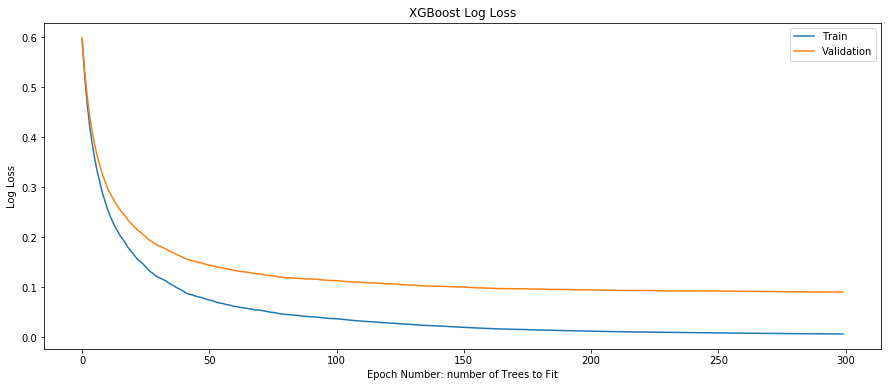

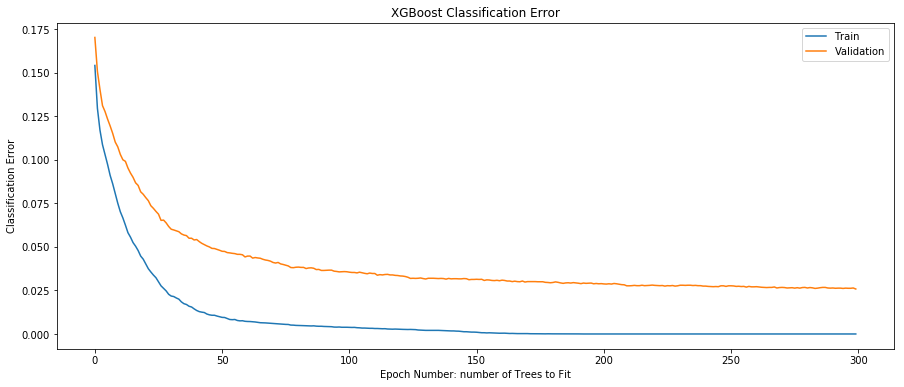

In [31]:
# (continued from above cell)
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epoch Number: number of Trees to Fit')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epoch Number: number of Trees to Fit')
plt.title('XGBoost Classification Error')
plt.show()

Eliminating less important features using Recursive Feature Elimination of RFE package of sklearn

In [32]:
import datetime
st = datetime.datetime.now() # start time
print("start time: ", st)

from sklearn.feature_selection import RFE
import xgboost as xgb
from xgboost.sklearn import XGBClassifier  

# To find more about the meaning of tuning parameters:
# https://xgboost.readthedocs.io/en/latest//parameter.html
# Use the best estimater obtained in the previous cell code-snippet
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
       max_delta_step=0, max_depth=7, min_child_weight=7, missing=None,
       n_estimators=300, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

rfe = RFE(xgb_model)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print()
print(rfe.ranking_)

nd = datetime.datetime.now() # end time 
print("\nCode run-time: ", nd-st)

# Each True and False belong to features starting from x0 to x99 contiguously.
# The features with True are important and the feature with False are not important (which can be dropped). 

start time:  2019-08-26 12:48:36.108117
[ True  True  True  True  True  True False False  True False  True False
  True False False False False False False  True False  True  True False
 False  True False  True False False False False False  True False  True
 False  True False False  True  True False  True  True  True False  True
 False  True  True  True False  True False False  True  True  True False
 False  True False  True False False  True False False  True  True  True
  True  True  True  True False False  True  True  True False False  True
 False  True False False False False  True False False False False  True
  True  True False  True]

[ 1  1  1  1  1  1 45  7  1 10  1 16  1  9 18 40 31 29  5  1  2  1  1 44
 48  1 32  1 37 22 35 12 39  1 51  1 25  1 19 41  1  1  6  1  1  1 27  1
 13  1  1  1 42  1 49 21  1  1  1 36 17  1 30  1 38 15  1 47  3  1  1  1
  1  1  1  1 28  4  1  1  1 14 33  1 26  1 34  8 46 20  1 43 11 50 23  1
  1  1 24  1]

Code run-time:  1:09:34.988718


Below is model tuning for Support Vector Classifier.

In [33]:
# Find the best kernel by grid search.

import datetime
st = datetime.datetime.now() # start time of running
print("started at: ",st)


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_valid, clf.predict(X_valid)
    print(classification_report(y_true, y_pred))
    print()   

nd = datetime.datetime.now() # end time of running 
print("Code run-time: ", nd-st)


# Best parameters set found on development set:
# {'C': 100, 'kernel': 'rbf'}


started at:  2019-08-26 13:58:11.179596
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.953 (+/-0.004) for {'C': 1, 'kernel': 'poly'}
0.955 (+/-0.008) for {'C': 10, 'kernel': 'poly'}
0.955 (+/-0.008) for {'C': 100, 'kernel': 'poly'}
0.955 (+/-0.008) for {'C': 1000, 'kernel': 'poly'}
0.986 (+/-0.003) for {'C': 1, 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 10, 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 100, 'kernel': 'rbf'}
0.988 (+/-0.003) for {'C': 1000, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9540
           1       0.99      0.95      0.97      2460

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.98      0.98     12000
weighted 